In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [76]:
df = pd.read_csv('puf2011.csv')

df = df[(df['RECID'] != 999996) &
        (df['RECID'] != 999997) &
        (df['RECID'] != 999998) &
        (df['RECID'] != 999999)
       ]
           
df = df.fillna(0)

## Check `E00650` and `E00600`

In [77]:
np.corrcoef(df.E00650, df.E00600)[0][1]

0.9395761242591618

In [78]:
df.shape[0]

163786

In [79]:
df_E00650_E00600 = df[(df.E00650 + df.E00600) > 0.]

In [80]:
df_E00650_E00600.shape[0]

67813

In [81]:
np.corrcoef(df_E00650_E00600.E00650, df_E00650_E00600.E00600)[0][1]

0.939040576302187

## Is `E01100` colinear with others?

In [82]:


#All predictors except E00650, E01100

predictors =  ['DSI', 'EIC', 'MARS', 'XTOT', 'E00200', 'E00300', 'E00400','E00600', 
               'E00800', 'E00900', 'E01400', 'E01500', 'E01700','E02100', 'E02300', 
               'E02400', 'E03150', 'E03210', 'E03240', 'E03270','E03300', 'E17500', 
               'E18400', 'E18500', 'E19200', 'E19800', 'E20100',  'E20400', 'E32800', 
               'F2441', 'N24']


predictors_plus_E01100 = predictors + ['E01100']

df = df[predictors_plus_E01100]


In [83]:
for i in predictors:
    corr = np.corrcoef(df.E01100, df[i])[0][1]
    print(i + ': ' + corr.astype(str))

DSI: -0.002450304407952469
EIC: -0.005770364072514708
MARS: -0.0005345798427549097
XTOT: 0.003859083819616031
E00200: 0.007005752776752023
E00300: -0.0003081428323845073
E00400: -0.0010374916953898746
E00600: 0.008484113561486501
E00800: -0.0002781844272934732
E00900: 0.005034885370630819
E01400: 0.0001884732076324321
E01500: 0.0015660212505961425
E01700: 0.0021503875160369416
E02100: 0.00014753560516280164
E02300: -0.0016594135443888484
E02400: -0.001440884039744523
E03150: 0.0008620084203943303
E03210: -0.0031823725541633035
E03240: 0.019969662889072242
E03270: 0.00860532275779318
E03300: 0.0014293979288300587
E17500: -0.0013407913784136928
E18400: 0.004602040473329941
E18500: 0.004892294056842053
E19200: -0.001167531869777565
E19800: 0.000551298700281853
E20100: -0.00037768355066800183
E20400: 8.729182348313901e-05
E32800: -0.001601310212416729
F2441: -0.0014562877461278545
N24: 0.0009255279089733505


## Check general collinearity

In [84]:
def min_eig(df):
    corr = np.corrcoef(df, rowvar=0)
    w, v = np.linalg.eig(corr) 
    return w.min()

In [85]:
min_eig(df[predictors_plus_E01100])

0.15278109560387398

Now after removing `E01100`

In [86]:
min_eig(df[predictors])

0.1527811046902145

Remove each feature from `predictors` to see what's causing the low value.

In [87]:
for i in predictors_plus_E01100:
    print(i + ': ' + 
          min_eig(df[predictors_plus_E01100].drop(i, axis=1)).astype(str))

DSI: 0.15320833091562402
EIC: 0.153592027315085
MARS: 0.15286895824299554
XTOT: 0.153506038604724
E00200: 0.15280520705294712
E00300: 0.15278275585177792
E00400: 0.1527814464329546
E00600: 0.15278145772391308
E00800: 0.15278188544958599
E00900: 0.1527811322684748
E01400: 0.15278349308877553
E01500: 0.1527919279589253
E01700: 0.1527813791518063
E02100: 0.15278155258264126
E02300: 0.15278479319798172
E02400: 0.15283505651650942
E03150: 0.15278471933203047
E03210: 0.1528049153436615
E03240: 0.1527812206792059
E03270: 0.15280752805448647
E03300: 0.15282510149299544
E17500: 0.15278190728315486
E18400: 0.15278263606480375
E18500: 0.15280796889245815
E19200: 0.15278592480437017
E19800: 0.1527811777152562
E20100: 0.15278112980902023
E20400: 0.15278960657747268
E32800: 0.16848649076965214
F2441: 0.1692281661687451
N24: 0.1542546921607233
E01100: 0.1527811046902145


## `E19800` vs `E20100`

Looks like e19800 and e20100, defined respectively as "Itemizable charitable giving: cash/check contributions. WARNING: this variable is already capped in PUF data." and "Itemizable charitable giving: other than cash/check contributions. WARNING: this variable is already capped in PUF data."

In [88]:
np.corrcoef(df.E19800, df.E20100)[0][1]

0.2212186664978193

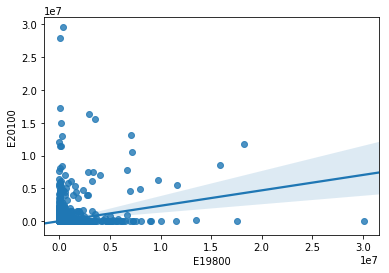

In [89]:
sns.regplot(df.E19800, df.E20100)
plt.show()